In [2]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
from sklearn.decomposition import PCA

In [8]:
# Carregando os dados.
df = pd.read_csv('http://www.ppgia.pucpr.br/~jean.barddal/datascience/customers.csv')

In [9]:
df

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...,...,...
435,1,3,29703,12051,16027,13135,182,2204
436,1,3,39228,1431,764,4510,93,2346
437,2,3,14531,15488,30243,437,14841,1867
438,1,3,10290,1981,2232,1038,168,2125


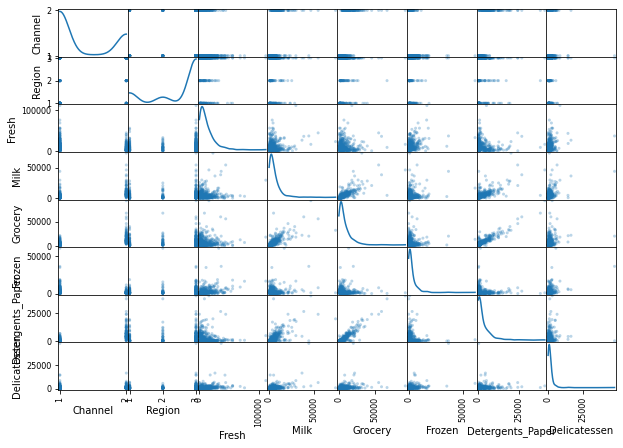

In [14]:
pd.plotting.scatter_matrix(df, alpha=0.3, diagonal='kde', figsize=(10,7))
plt.show()

In [30]:
# TODO: aplicar transformação nos dados.
df = np.log(df)

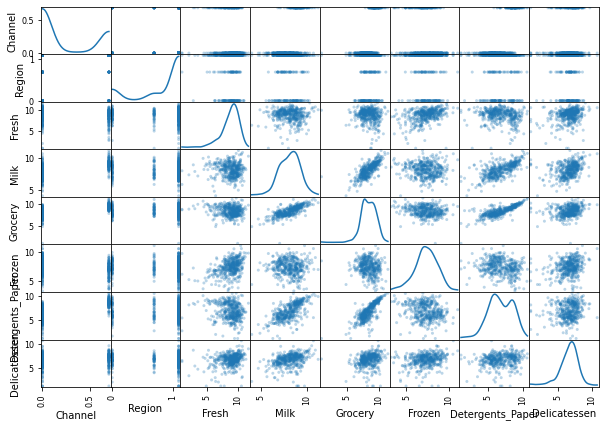

In [37]:
pd.plotting.scatter_matrix(df, alpha=0.3, diagonal='kde', figsize=(10,7))
plt.show()

In [44]:
# Implementar o PCA.
pca = PCA()
pca.fit(df)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [45]:
dados_pca = pca.transform(df)

In [46]:
dados_pca

array([[-1.79383392, -0.0689751 , -0.92570948, ...,  0.40925053,
        -0.11851781,  0.25368903],
       [-1.84146438, -0.86857315,  0.20296476, ...,  0.25197688,
        -0.22617109,  0.26605857],
       [-1.93280145, -1.67563076,  1.30716089, ...,  0.35090025,
        -0.24030422,  0.278385  ],
       ...,
       [-3.77819988, -0.92785491, -0.99395451, ..., -0.13531361,
        -0.18238219,  0.02878006],
       [ 1.67217536, -0.47344059,  0.55732067, ..., -0.04233501,
        -0.21532417, -0.0318003 ],
       [ 0.75274791,  3.63628565, -1.97392608, ...,  0.15174462,
        -0.10515642, -0.19916134]])

In [47]:
def pca_results(df, pca):
    '''
    Create a DataFrame of the PCA results
    Includes dimension feature weights and explained variance
    Visualizes the PCA results
    '''
    # Dimension indexing
    dimensions = ['Dimension {}'.format(i) for i in range(1,len(pca.components_)+1)]
    # PCA components
    components = pd.DataFrame(np.round(pca.components_, 4), columns = df.keys())
    components.index = dimensions
    # PCA explained variance
    ratios = pca.explained_variance_ratio_.reshape(len(pca.components_), 1)
    variance_ratios = pd.DataFrame(np.round(ratios, 4), columns = ['Explained Variance'])
    variance_ratios.index = dimensions
    # Create a bar plot visualization
    fig, ax = plt.subplots(figsize = (14,8))
    # Plot the feature weights as a function of the components
    components.plot(ax = ax, kind = 'bar');
    ax.set_ylabel("Feature Weights")
    ax.set_xticklabels(dimensions, rotation=0)
    # Display the explained variance ratios
    for i, ev in enumerate(pca.explained_variance_ratio_):
      ax.text(i-0.40, ax.get_ylim()[1] + 0.05, "Explained Variance\n %.4f"%(ev))
    # Return a concatenated DataFrame
    return pd.concat([variance_ratios, components], axis = 1)

,Explained Variance,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Dimension 1,0.4366,-0.1100,-0.0051,0.1725,-0.3918,-0.4515,0.1717,-0.7412,-0.1476
Dimension 2,0.2697,0.0034,0.0065,-0.6848,-0.1628,-0.0699,-0.4876,-0.0427,-0.5099
Dimension 3,0.1134,-0.0228,-0.0216,-0.6746,0.0343,-0.0303,0.2861,-0.2150,0.6432
Dimension 4,0.0939,0.0024,-0.0346,-0.2121,0.0178,0.0646,0.8045,0.1908,-0.5155
Dimension 5,0.0446,-0.0118,0.0219,-0.0014,0.7230,0.3481,-0.0353,-0.5622,-0.1956
Dimension 6,0.0224,0.0027,0.0885,-0.0308,0.5390,-0.8117,-0.0135,0.2027,-0.0224
Dimension 7,0.0153,-0.0496,-0.9937,0.0136,0.0651,-0.0620,-0.0414,0.0120,-0.0048
Dimension 8,0.0041,0.9924,-0.0507,0.0072,-0.0317,-0.0474,0.0228,-0.0940,-0.0011


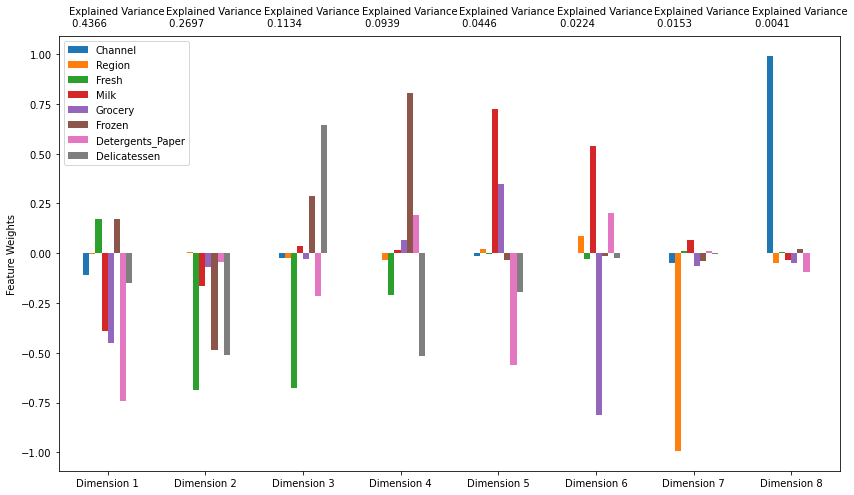

In [48]:
pca_explicacao = pca_results(df, pca)
pca_explicacao

In [50]:
pca_explicacao['Explained Variance'].cumsum()

Dimension 1    0.4366
Dimension 2    0.7063
Dimension 3    0.8197
Dimension 4    0.9136
Dimension 5    0.9582
Dimension 6    0.9806
Dimension 7    0.9959
Dimension 8    1.0000
Name: Explained Variance, dtype: float64

## PCA EM PROBLEMA DE CLASSIFICAÇÃO

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.datasets import fetch_openml

In [52]:
mnist = fetch_openml('mnist_784')

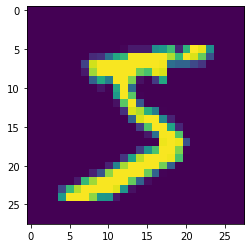

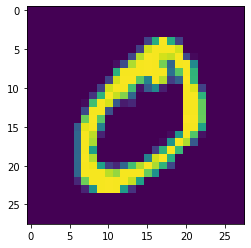

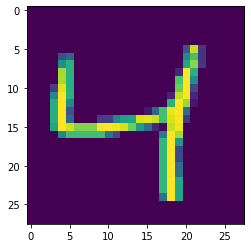

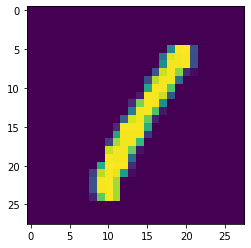

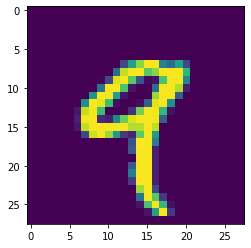

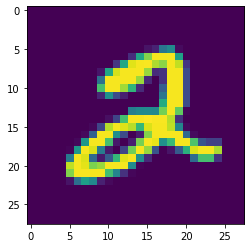

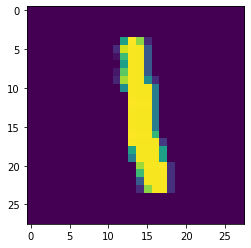

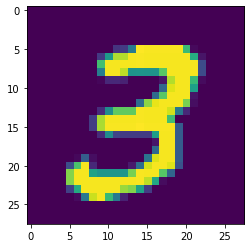

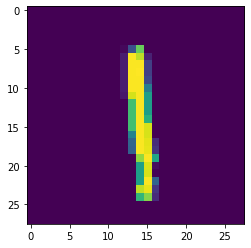

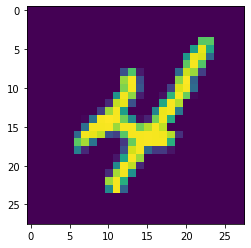

In [60]:
# visualizar um dígito.
for i in range(0,10):
    plt.imshow(mnist.data[i].reshape(28,28).astype(float))
    plt.show()

In [63]:
df_mnist = pd.DataFrame(mnist.data)
df_mnist['target'] = mnist.target

In [64]:
df_mnist.head(4)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,target
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [65]:
# Pegando apenas uma fração da base.
np.random.seed(42)
frac = 0.25
df_mnist = df_mnist.sample(frac=frac).reset_index(drop=True)

In [66]:
# Criar conkuntos de dados.
X, y = df_mnist.drop('target', axis=1), df_mnist['target']

In [67]:
# Definir conjunto de treino e teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42, stratify=y)

# Estratificação
# Base Dados Completa:
# Classe 0 - 10%
# Classe 1 - 80%
# Classe 2 - 10%

# Divisão em treinamento e teste: 50% para treino e 50% para teste.

# Se eu não uso Estratificação, é possível que, no meu treinamento/teste,
# eu perceba algo assim^
# Classe 0 - 10%
# Classe 1 - 90%
# Classe 2 - 0%

# Com estratificação(mantenho proporções próximas as originais):
# Classe 0 - 10%
# Classe 1 - 80%
# Classe 2 - 10%


In [68]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [69]:
X_train = scaler.fit_transform(X_train) # aplicando escala no conjunto de treino.
X_test = scaler.transform(X_test) # aplicando a mesma escala no conjunto de teste.

In [70]:
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [71]:
y_pred = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred)
print(f'Acurácia antes = {100.0 * acc_lr}%')

Acurácia antes = 88.38857142857142%


In [74]:
# Aplicação do PCA com diferentes percentuais de variância a serem mantidos.
percentuais = [0.99, 0.95, 0.90]

for percent in percentuais:
    # Criar um PCA com o percentual.
    pca = PCA(percent)

    # Transfromar os dados usando o PCA.
    X_train_pca = pca.fit_transform(X_train)
    X_test_pca = pca.transform(X_test)

    # Treinar o modelo.
    lr.fit(X_train_pca, y_train)

    # Testar o modelo.
    y_pred = lr.predict(X_test_pca)
    acc_lr = accuracy_score(y_test, y_pred)
    print(f'Variância mantida = {percent}% Acurácia antes = {100.0 * acc_lr}%')

Variância mantida = 0.99% Acurácia antes = 87.83999999999999%
Variância mantida = 0.95% Acurácia antes = 89.2%
Variância mantida = 0.9% Acurácia antes = 89.92%


## T-SNE no dataset da mnist

In [75]:
mnist = fetch_openml('mnist_784')

In [76]:
df_mnist = pd.DataFrame(mnist.data)

In [77]:
df_mnist['target'] = mnist.target

In [78]:
# Como o t-sne é não supervisionado, vamos dividir os dados em X e Y,
# e aplicar o t-sne apenas no x.
X, y = df_mnist.drop('target', axis=1), df_mnist['target']

In [92]:
# Amostra da base de dados(2.5k de linhas para teste inicial).
X = X[:5000]
y = y[:5000]

In [93]:
# Implementar o t-sne
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, perplexity=40, n_iter=1000)

In [94]:
dados_tsne = tsne.fit_transform(X)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


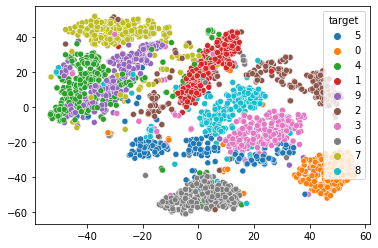

In [95]:
sns.scatterplot(dados_tsne[:, 0], dados_tsne[:, 1], hue=y)
plt.show()

In [96]:
# -- O que representa o eixo x?
# -- Resposta: NADA que eu consiga mapear para os atributos originais.

# -- O que representa o eixo y?
# -- Resposta: NADA que eu consiga mapear para os atributos originais.